In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


### IMPLEMENTATION FROM SCRATCH

#### As we have to find the Best set of Line 
#### formula : Y=mX+c
####      m=Variance of X/Covariance of X and y
####         : m=((X - x_mean) * (y - y_mean))/((X-x_mean)**2)
####         : c= y_mean - m * x_mean This ensures the line passes through the average point

Slope (m): 1.968467510701019
Intercept (c): 3.2221510774472293


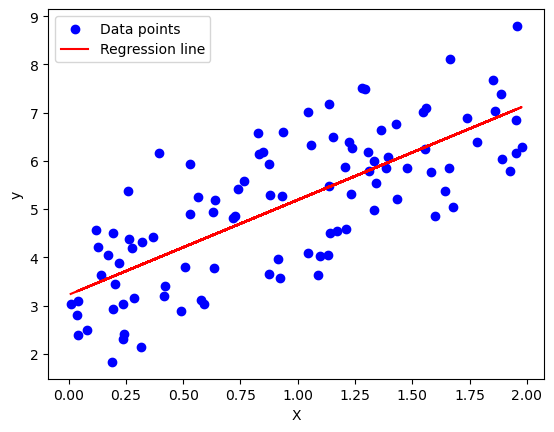

In [6]:
# Sample data
np.random.seed(0)
X = 2 * np.random.rand(100)
y = 3 + 2 * X + np.random.randn(100)

x_mean = np.mean(X)
y_mean = np.mean(y)

# slope
m = np.sum((X - x_mean) * (y - y_mean)) / np.sum((X - x_mean)**2)

# intercept
c = y_mean - m * x_mean

print("Slope (m):", m)
print("Intercept (c):", c)


y_pred = m * X + c

plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


(100,)

In [2]:
df=pd.read_csv("Ecommerce_Customers.csv")

In [4]:
df.head(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
